# *K*-Means Clustering

$K$-means clustering is a simple and elegant approach for partitioning a data set into $K$ distinct, non-overlapping clusters. To perform $K$-means clustering, we must first specify the desired number of clusters $K$; then the $K$-means algorithm will assign each observation to exactly one of the $K$ clusters.

In [1]:
import pandas as pd
df = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/openness.dta')

##  Obs:   114

## 1. open                     imports as % GDP, '73-
## 2. inf                      avg. annual inflation, '73-
## 3. pcinc                    1980 per capita inc., U.S. 
## 4. land                     land area, square miles
## 5. oil                      =1 if major oil producer
## 6. good                     =1 if 'good' data
## 7. lpcinc                   log(pcinc)
## 8. lland                    log(land)
## 9. lopen                    log(open)
## 10. linf                    log(inf)
## 11. opendec                 open/100
## 12. linfdec                 log(inf/100)

df.head()

,open,inf,pcinc,land,oil,good,lpcinc,lland,lopen,linf,opendec,linfdec
0,31.400000,9.9,1998.0,919595.0,0.0,0.0,7.599902,13.731690,3.446808,2.292535,0.314,-2.312635
1,9.400000,117.0,4342.0,1072067.0,0.0,1.0,8.376090,13.885100,2.240710,4.762174,0.094,0.157004
2,16.700001,9.5,8349.0,2966150.0,0.0,1.0,9.029897,14.902780,2.815409,2.251292,0.167,-2.353878
3,35.599998,5.0,8230.0,32375.0,0.0,1.0,9.015541,10.385140,3.572345,1.609438,0.356,-2.995732
4,91.000000,4.8,9185.0,240.0,1.0,0.0,9.125327,5.480639,4.510859,1.568616,0.910,-3.036554


The $K$-means clustering procedure results from a simple and intuitive mathematical problem.We begin by defining some notation. Let $C_1,\ldots , C_K$ denote sets containing the indices of the observations in each cluster. These sets satisfy two properties:

1. $C_{1} \cup C_{2} \cup \ldots \cup C_{K}=\{1, \ldots, n\}$. In other words, each observation belongs to at least one of the $K$ clusters.

2. $C_{k} \cap C_{k^{\prime}}=\{\emptyset\}$ for all $k \neq k^{\prime}$. In other words, the clusters are non-overlapping: no observation belongs to more than one cluster.

For instance, if the $i$th observation is in the $k$ th cluster, then $i \in C_{k}$. The idea behind $K$ -means clustering is that a good clustering is one for which the within-cluster variation is as small as possible. The within-cluster variation for cluster $C_{k}$ is a measure $W\left(C_{k}\right)$ of the amount by which the observations within a cluster differ from each other. Hence we want to solve the problem

$$
\underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} W\left(C_{k}\right)\right\}.
$$

In words, this formula says that we want to partition the observations into $K$ clusters such that the total within-cluster variation, summed over all $K$ clusters, is as small as possible. Solving this last equation seems like a reasonable idea, but in order to make it actionable we need to define the within-cluster variation. There are many possible ways to define this concept, but by far the most common choice involves squared Euclidean distance. That is, we define

$$
W\left(C_{k}\right)=\frac{1}{\left|C_{k}\right|} \sum_{i, i^{\prime} \in C_{k}} \sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^{2},
$$

where $p=\text{dim}(x_{i j})$, and $\left|C_{k}\right|$ denotes the number of observations in the $k$ th cluster. In other words, the within-cluster variation for the $k$th cluster is the sum of all of
the pairwise squared [Euclidean distances](https://en.wikipedia.org/wiki/Euclidean_distance) between the observations in the $k$th cluster, divided by the total number of observations in the $k$th cluster. Therefore

$$
\underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} \frac{1}{\left|C_{k}\right|} \sum_{i, i^{\prime} \in C_{k}} \sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^{2}\right\}
$$

***
**Algorithm**: <ins>_K_ Means Clustering</ins>

1. Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations.

2. Iterate until the cluster assignments stop changing:
     1. For each of the $K$ clusters, compute the cluster centroid. The $k$th cluster centroid is the vector of the $p$ feature means for the observations in the $k$th cluster.
     2. Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).
***

✍🏼 This algorithm is guaranteed to **decrease** the value of the objective function at each step.  Since the resulting classification will depend on the initial (random) cluster assignment in Step 1, the algorithm is said to find a _local_ rather than a _global_ optimum. Therefore it is important to run the algorithm multiple times from different random initial configurations, e.g., between 25 to 50 times is recommended. Then one selects the _best_ solution, i.e., that for which the objective function is the smallest.

💻 Notice that the $K$-means algorithm described here *only* works for __continuously distributed__ data. It will _not_ work for categorical features.

💻 It is recommended to _scale_ the features prior to applying the algorithm. Different scales among features will severely affect the classification algorithm.

In [3]:
import patsy
X = patsy.dmatrix('-1 + lopen + linf', data=df, return_type='dataframe')
X.head()

,lopen,linf
0,3.446808,2.292535
1,2.240710,4.762174
2,2.815409,2.251292
3,3.572345,1.609438
4,4.510859,1.568616


<ins>**Distance Measures**</ins>: Euclidean Distance

This is the default distance measure in most ML algorithms and the one used in the explanation above. If chosen, then observations with high values of the features will be clustered together, and observations with low values of the features will also be clustered together.

⚠️ Unfortunately, `sklearn` <ins>only</ins> provides this distance measure. See this [post](https://stackoverflow.com/questions/5529625/is-it-possible-to-specify-your-own-distance-function-using-scikit-learn-k-means) to learn about alternative packages with different distance measures.

In [4]:
from sklearn.cluster import KMeans

## Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
pred_y = kmeans.fit_predict(X)

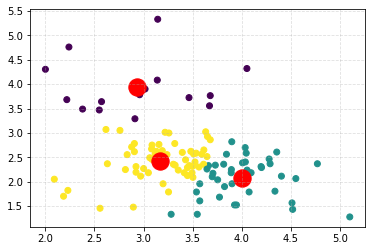

In [5]:
from matplotlib import pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=kmeans.labels_.astype(float)) #Plotting the data colored by cluster
plt.grid(alpha=0.4,linestyle='--') #Adding a grid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### Choosing *K*: The Elbow Method

The idea is that we want a small within-cluster variance, but that the within-cluster variance tends to decrease toward $0$ as we increase $K$ (the within-cluster variance is exactly $0$ when $K$ is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of $K$ that still has a low within-cluster variance, and the [elbow](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) usually represents where we start to have diminishing returns by increasing $K$.

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.grid(alpha=0.4,linestyle='--') #Adding a grid
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Choosing _K_: Silhouette Score

__Install the [yellowbrick](https://www.scikit-yb.org/en/latest/index.html) package__:

`xxxxx@ip-172-31-73-5:~$ sudo -i`

`[sudo] password for xxxxx: `

`(base) root@ip-172-31-73-5:~# conda install -c districtdatalabs yellowbrick`

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as _K_-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

1. Mean distance between the observation and all other data points in the _same_ cluster. This distance can also be called a __mean intra-cluster distance__. The mean distance is denoted by $a$.
2. Mean distance between the observation and all other data points of the _next nearest_ cluster. This distance can also be called a __mean nearest-cluster distance__. The mean distance is denoted by $b$.

Silhouette score, $S$, for each sample is calculated using the following formula:

$$S = \frac{(b - a)}{\max(a, b)}$$

The value of the Silhouette score varies from -1 to 1.

👉🏼 If the score is 1, the cluster is dense and well-separated than other clusters.

👉🏼 A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.

👉🏼 A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [ ]:
from sklearn.metrics import silhouette_score

## Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
pred_y = kmeans.fit_predict(X)

score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Here is the Silhouette analysis done on the above plots to select an optimal value for `n_clusters`.

The value of `n_clusters` as 5 looks to be suboptimal for the given data due to the following reasons:

🛑 Wide fluctuations in the size of the silhouette plots.

The value of 3 and 4 for `n_clusters` looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores. The thickness of the silhouette plot representing each cluster also is a deciding point. For the plot with `n_cluster=3` (top right), the thickness is more uniform than the plot with `n_cluster` as 2 (top left) with one cluster thickness much more than the other. Thus, one can select the optimal number of clusters as 3.

## Using _K_-Means Clustering in Regression

Imagine you are interested in estimating the model

$$
pcinc = \beta_0+\beta_1 oil+\beta_2 good + \beta_3 linf + \beta_4 lland + \beta_5 lopen + u\text{,}
$$

but the researcher is concerned that countries belong to $K$ clusters and that unobserved cluster-specific characteristics might be correlated with the features $oil$, $good$, $linf$, $lland$, or $lopen$, then a more suitable model would be 

$$
pcinc = \beta_0+\beta_1 oil+\beta_2 good + \beta_3 linf + \beta_4 lland + \beta_5 lopen + \alpha_2 d_2 +\alpha_3 d_3 + \cdots +\alpha_K d_K + e\text{,}
$$

where the dummy variables ${d_j:j=1,\ldots,K}$ equal one if a country belongs to cluster $j$ and zero otherwise. If we do _not_ know the group a particular country belongs to, we could apply _K_-means clustering, and then include group membership as a control variables:

In [ ]:
## Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
pred_y = kmeans.fit_predict(X)

In [ ]:
## Creating the dummy variables based on group membership
df['group'] = pd.Series(pred_y, index=df.index)
## Checking the numbers in each cluster to select base category
df['group'].value_counts()

In [ ]:
## Creating and inspecting the extended data set
datos = pd.get_dummies(df, columns = ['group'])
datos.head()

🛑 You need to install the `stargazer` module using `pip install stargazer` as an admin.

In [ ]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="lpcinc ~ oil + good + linf + lland + lopen", data=datos).fit(cov_type='HC1')
model2 = sm.ols(formula="lpcinc ~ oil + good + linf + lland + lopen + group_0 + group_1", data=datos).fit(cov_type='HC1')

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
HTML(Stargazer([model1,model2]).render_html())

Similarly, if we also believe that group membership affects the variance of the unobserved error, then we should calculate standard errors accordingly, i.e., unobservables affecting the per-capita income in each countries _within_ a cluster are coorelated, but not _between_ countries.

In [ ]:

model3 = sm.ols(formula="lpcinc ~ oil + good + linf + lland + lopen", data=datos).fit(cov_type='cluster', cov_kwds={'groups': df.group})
model4 = sm.ols(formula="lpcinc ~ oil + good + linf + lland + lopen + group_0 + group_1", data=datos).fit(cov_type='cluster', cov_kwds={'groups': df.group})

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
HTML(Stargazer([model1,model2,model3,model4]).render_html())